<a href="https://colab.research.google.com/github/mc365691/2023_CISC7201-courseproject_mc36569/blob/main/ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Machine Learning:  Predict Apple Company Stock Price**
**MC365691 SOU KA FONG**

Apple Company is an American multinational technology company. The current business including design, development and sales of electronics, computer software, online services, and personal computers. There are 502 retail stores which are located in 24 different countries. Furthermore, it also has online Apple stores and iTunes stores. The most popular products are iPhone, iPad, iMac, or iWatch, even everybody has owned one.

The net income of Apple company is increasing rapidly. Therefore, I attempt to utilize machine learning to forecast Apple's stock movement because I am interested about how stock is performing.


Stock price forecasting has always attracted people interested in investing in the stock market and stock exchange. It is also an important research topic in the financial world. Moreover,
I will compare the characteristics of LSTM(Long Short-Term Memory) and Regresson model in predicting prices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf  #pip install yfinance collect stock price from yahoo


I recommend using Colab.google (https://colab.google/)

Colab offers a free Jupyter notebook service, and many frequently used Python packages are pre-installed.

**Install with the pip command to set up a python environment**

pip install numpy

pip install matplotlib

pip install pandas

pip install yfinance

In [3]:
start ='2013-01-01'
end = '2022-12-31'
#apple company stock name 'AAPL'
stock = 'AAPL'
#data can download from
data=yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


Download the Apple company's stock price from Yahoo finance. There we collect the start day of stcok is 2013-01-01 and end day is 2022-12-31.

In [4]:
data.reset_index(inplace=True) # Reset to the integer index, mark the 0 to 2517

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769094,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557428,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096230,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001547,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044611,458707200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2514,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2515,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
2516,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700


In [6]:
moving_100_days = data.Close.rolling(100).mean()   #insight the 100days average moving

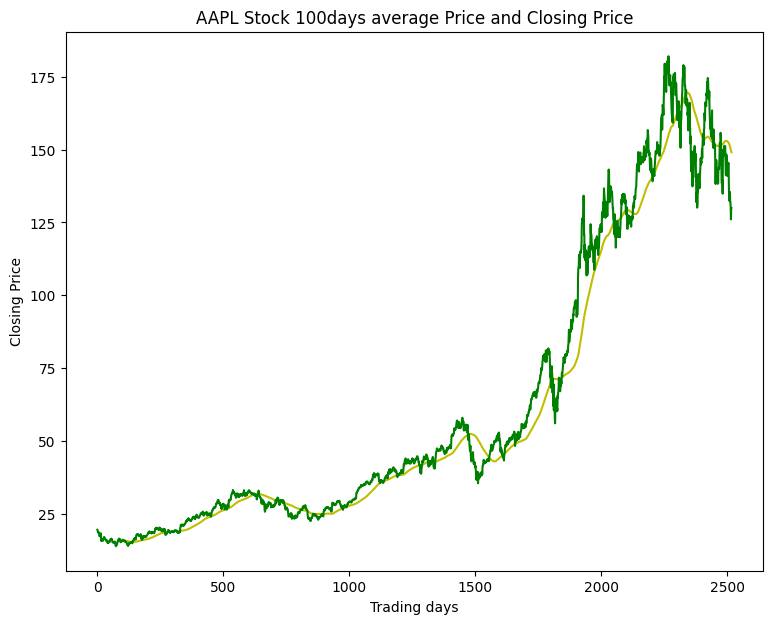

In [9]:
plt.figure(figsize=(9,7))   #plot the chart, mark down figure the size and color
plt.plot(moving_100_days, 'y')  #yellow
plt.plot(data.Close, 'g')  #green
plt.title('AAPL Stock 100days average Price and Closing Price')
plt.xlabel('Trading days')
plt.ylabel('Closing Price')

plt.show()

The **yellow** line on this chart illustrates the average price of APPLE's stock per every 100 days.

In general, investors focus on the **closing price**(green color line) when making stock investments because it indicates the stock's price trend and can be used to track the stock's volatility.

In my view, the stock may be in an upward trend if the closing price is higher than the average. Furthermore, we evaluate a stock's volatility risk by comparing its closing and average price. In this chart, a small difference between them could indicate that the price of Apple's stock is less volatile and more stable.


### **Insight of Closing price and 100 & 200 days average stock price moving**

In [10]:
moving_200_days = data.Close.rolling(200).mean()  #insight the 200days average moving

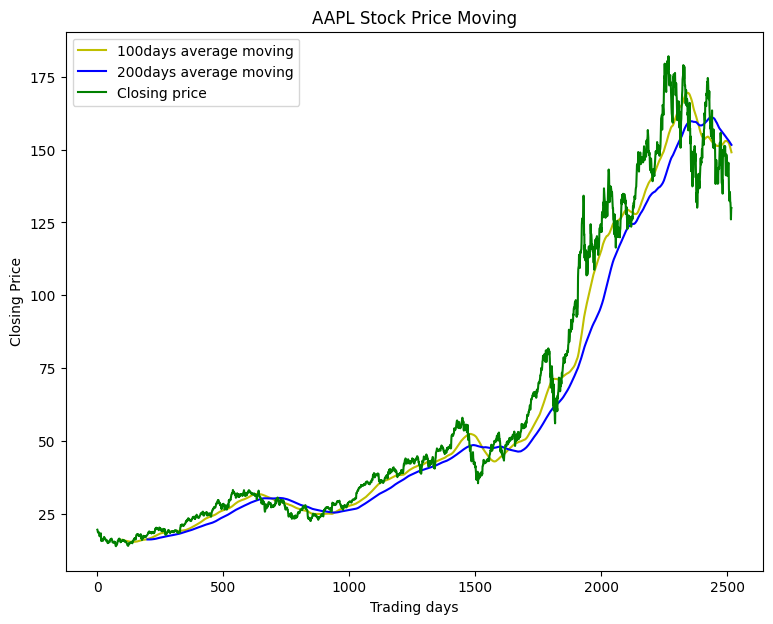

In [11]:
plt.figure(figsize=(9,7))   #compare 100days 和 200days average moving
plt.plot(moving_100_days, 'y', label='100days average moving')
plt.plot(moving_200_days, 'blue',label='200days average moving')
plt.plot(data.Close, 'green',label='Closing price')
plt.legend()
plt.title('AAPL Stock Price Moving')
plt.xlabel('Trading days')
plt.ylabel('Closing Price')
plt.show()

**Green line:** Closing price

**Yellow line:** 100days average stock price moving

**Blue line:** 200days average stock price moving



***Insight:*** Apple company by building up a large user base of its own products over many years, Apple has a large and loyal customer, and seeks to diversify its business and capitalize on the advantages of the Apple brand.
Over the past nine years, there has been an upward trend in stock prices, accompanied by small fluctuations within the 100-day and 200-day range and generally stable trends.

More specifically, the stock price has increased significantly over the past three years, there have been noticeable dramatic fluctuations in the closing price, and the risk is relatively high. Meanwhile, there is an obvious distinction between 200 days average moving and closing prices. As a result, it is clear that Apple's stock is volatile, and before making an investment, we ought to evaluate the risks and return.

In [12]:
data.dropna(inplace=True) #cleaning activities,missing values will be deleted.

**Data collection and cleaning:** In charge of collecting information from yahoo finace sources, we have to use instruments or write scripts to clean and preprocess
the data in order to guarantee its accuracy and reliability.
We can just check it out if there are any null values.  Missing values which will be deleted.
Then, we need to insight the daily closing price of stock.

### **Machine Learing Predict Apple stock price using LSTM**
LSTM is a special recurrent neural network (RNN) structure for processing sequence data, such as speech recognition, natural language processing, video analysis and other tasks.

(To learn more about LSTM)
https://blog.csdn.net/qq_41815943/article/details/122736432

In [13]:
#100days 75% of training data, 25% of testing data
data_training = pd.DataFrame(data.Close[0: int(len(data)*0.75)])
data_testing = pd.DataFrame(data.Close[int(len(data)*0.75): len(data)])

First 100days **75% of training** data set, remaining **25% of testing** data set. Next, we can draw the shape data and scope to training data set.

In [14]:
data_training.shape[0] #find the training data set

1888

In [15]:
data_testing.shape[0] #25% data set use for testing

630

There is 1888 data of Apple stock price use in our training model. Further, 630 trading days data set will be testing.

In [18]:
from sklearn.preprocessing import MinMaxScaler #Scikit-learn a machine learning library for Python
scaler=MinMaxScaler(feature_range=(0,1))  #The data is scaled, and the scaled data falls between 0 and 1

pip install -U scikit-learn

To download and install the most recent version of the Scikit-learn library from the Python suite index, use the pip tool.

In [19]:
data_training_scale = scaler.fit_transform(data_training) #Using the data_training data, which determine the minimum and maximum values needed for feature scaling.

In [20]:
y=[]   #The training data is stored in two blank lists.
x=[]
for i in range(100, data_training_scale.shape[0]):
  x.append(data_training_scale[i-100:i])   #Data range from i-100 to i
  y.append(data_training_scale[i,0])

To hold the training data's target and feature variables, two blank lists are made.

Then,
Y represent the dependent variable.
X represent the independden variable.

In [21]:
x, y = np.array(x), np.array(y) #Convert x and y to NumPy arrays

In [22]:
from keras.layers import Dense,Dropout,LSTM  #Neural network models are constructed using it.
from keras.models import Sequential

pip install keras


In [23]:
model = Sequential()   #Arrange several layers of a neural network sequentially.
model.add(LSTM(units=50,activation= 'relu',return_sequences = True, input_shape = ((x.shape[1],1)))) #for example: units=50 indicates that there are 50 neurons in that layer.
model.add(Dropout(0.1))   #used to reduce the risk of overfitting by randomly discarding 10% of neurons.
model.add(LSTM(units = 70,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 90,activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 120,activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units =1))   #as we only predict closing price, units=1

We arrange several layers of a neural network sequentially.

Using multiple layers of LSTM and Dropout, this code constructs a neural network model for learning and predicting sequence data. We have the ability to modify and enhance the model's specific architecture to suit our requirements.

The probability of overfitting is decreased by dropout. In order to enhance the model's capacity for generalization and resistance to overfitting, it is used during the training phase to specify the probability.

***For example:*** you can set 0.5 Dropout, that reduce the risk of overfitting by randomly discarding 50% of neurons.

In my view, the complexity of your dataset will determine how many units parameters the LSTM layer needs.

In this situation, when you have **huge** amount of data set, you can consider utilizing **bigger units**. You can try to set diiference units to improve the performance of your model.



In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Adam minimizes the loss function of the model


**Building a neural network model:**

The *difference* between the model's predicted value and the actual value is measured by mean squared error.

The number of training times and training samples are determined based on the size of the data set.

You can try to adjust the size of the parameters to avoid overfitting problems.

Adjust and optimize the performance of your model repeatedly.


In [25]:
model.fit(x,y,epochs = 52, batch_size =33, verbose=1)
#input data x, and outcome y
#epochs=52 represent the number of times during training
#each training used 33 samples
#verbose=1, displays a progress bar

Epoch 1/52
55/55 [==============================] - 26s 336ms/step - loss: 0.0193
Epoch 2/52
55/55 [==============================] - 17s 307ms/step - loss: 0.0044
Epoch 3/52
55/55 [==============================] - 17s 308ms/step - loss: 0.0036
Epoch 4/52
55/55 [==============================] - 18s 334ms/step - loss: 0.0034
Epoch 5/52
55/55 [==============================] - 18s 332ms/step - loss: 0.0029
Epoch 6/52
55/55 [==============================] - 18s 330ms/step - loss: 0.0034
Epoch 7/52
55/55 [==============================] - 17s 319ms/step - loss: 0.0031
Epoch 8/52
55/55 [==============================] - 19s 339ms/step - loss: 0.0031
Epoch 9/52
55/55 [==============================] - 17s 308ms/step - loss: 0.0030
Epoch 10/52
55/55 [==============================] - 18s 328ms/step - loss: 0.0026
Epoch 11/52
55/55 [==============================] - 24s 449ms/step - loss: 0.0028
Epoch 12/52
55/55 [==============================] - 17s 308ms/step - loss: 0.0028
Epoch 13/52
5

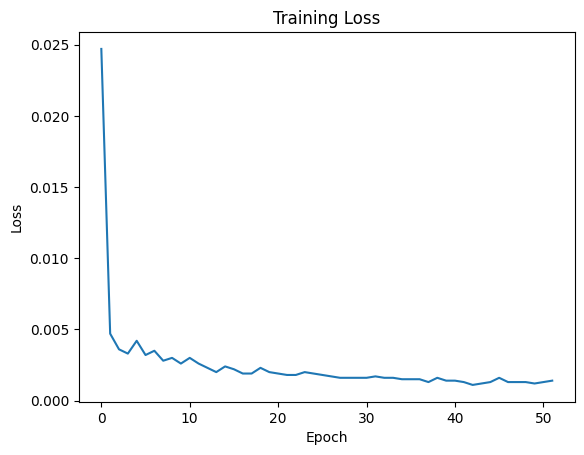

In [26]:
loss_value=[0.0247, 0.0047, 0.0036, 0.0033, 0.0042, 0.0032, 0.0035, 0.0028, 0.0030, 0.0026, 0.0030, 0.0026, 0.0023, 0.0020, 0.0024, 0.0022, 0.0019, 0.0019, 0.0023, 0.0020, 0.0019, 0.0018, 0.0018, 0.0020, 0.0019, 0.0018, 0.0017, 0.0016, 0.0016, 0.0016, 0.0016, 0.0017, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0013, 0.0016, 0.0014, 0.0014, 0.0013, 0.0011, 0.0012, 0.0013, 0.0016, 0.0013, 0.0013, 0.0013, 0.0012, 0.0013, 0.0014]

#collect all loss record in []
plt.plot(loss_value) #plot the result

#lebal chart name
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Model summary interpretation:**



*   There are 4 layers in the LSTM model

*   (None, 100, 50) means 100  time sequence step, 50 neurons in that layer
*   The total number of training parameters is 203,641


*   Train 52 Epochs
*   Batch size is set to 33


*   Set the Dropout in order to reduce the risk of overfitting












In the training set of this model the loss value gradually becomes smaller

**Loss value:** Evaluating the loss value of a model on a test set is a common evaluation metric.Then, the loss value is the difference between the predicted value and the actual value of the model, and the smaller the loss value, the better prediction effect of the model.

In [27]:
model.summary()
#get LSTM model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 70)           33880     
                                                                 
 dropout_1 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 90)           57960     
                                                                 
 dropout_2 (Dropout)         (None, 100, 90)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               1

### **Let's testing our model**

In [28]:
#past 100days date will be calculate
#last 100 testing data from the training data set
past_100_days=data_training.tail(100)

In [29]:
data_testing =pd.concat([past_100_days, data_testing], ignore_index=True)  # combine testing data and past 100days data

In [30]:
data_testing_scale= scaler.fit_transform(data_testing)
#we need to make sure the data is in the same range

In [31]:
y=[]   #The testing data is stored in two blank lists, predict the outcome value of Y
x=[]
for i in range(100, data_testing_scale.shape[0]):
  x.append(data_testing_scale[i-100:i])   #Data range from i-100 to i
  y.append(data_testing_scale[i,0])
x,y = np.array(x), np.array(y)

In [32]:
predict_y =model.predict(x)
#input x into model

20/20 [==============================] - 2s 86ms/step


In [33]:
scale=1/scaler.scale_     #Range of data, scaling


In [34]:
predict_y=predict_y*scale
#inverse scaling

In [35]:
y=y*scale
# our target variable outcome is y



*   **y is Actual closing price**
*   **predict_y is LSTM prediction  price**





There will plot the chart, which compare the prediction and actual price

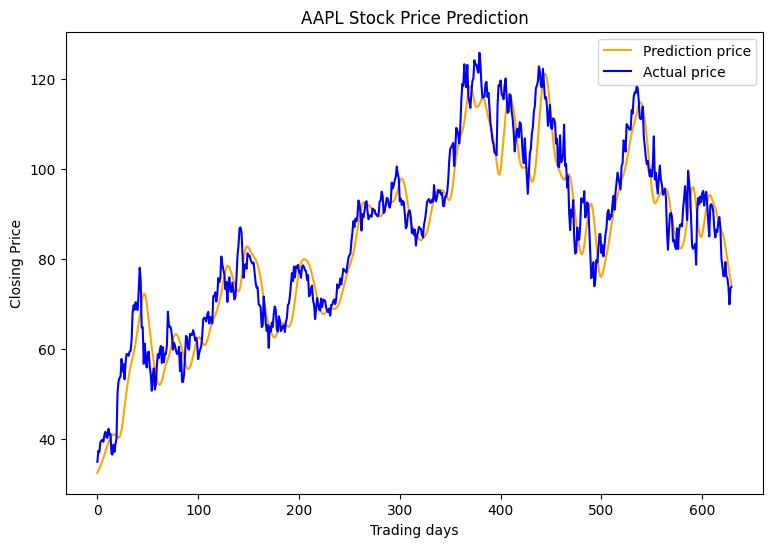

In [36]:
plt.figure(figsize=(9,6))      #show chart: label x,y name, and line color
plt.plot(predict_y,'orange', label='Prediction price')
plt.plot(y,'blue', label='Actual price')
plt.xlabel('Trading days')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price Prediction')  #chart tltle
plt.legend()
plt.show()

In my view, LSTM predicted price movements similar to actual closing price movements. Further, the maximum peak value predicted by the model is lower than the actual closing price.

In [37]:
model.save('Apple stock LSTM prediction model')  #save modle and name

### **Predicting Apple Stock Prices with Machine Learning Using Linear Regression**

By analyzing historical stock price data, we can find hidden patterns and trends and predict future stock price movements.

There will compare the LSTM and Regression model.

In [38]:
from sklearn.linear_model import LinearRegression

pip install scikit-learn

In [39]:
data_training = pd.DataFrame(data.Close[0:int(len(data)*0.75)])     # 75% training data set
data_testing = pd.DataFrame(data.Close[int(len(data)*0.75):len(data)])   #25% testing data set

In [40]:
y_train = np.array(data_training['Close']).reshape(-1, 1)
#the training closing price of the stock  converted into an array of NumPy
x_train = np.array(range(1, len(data_training) + 1)).reshape(-1, 1)
#convert the data into a model, reshape(-1, 1)

In [41]:
data_training   #1888 training data

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070
...,...
1883,91.209999
1884,88.407501
1885,90.445000
1886,91.199997


**Set up Regression modle and trainging data set**

In [42]:
regressor = LinearRegression()
#creat linear regression model
regressor.fit(x_train, y_train)
#find the best fit line to predict the target value (y)

LinearRegression()

In [43]:
y_test = np.array(data_testing['Close']).reshape(-1, 1)
#25% test data converted into an array of NumPy
x_test = np.array(range(len(data_training), len(data))).reshape(-1, 1)

In [44]:
y_predition_regression =  regressor.predict(x_test) #using regression model predicts x_test data

In [45]:
data_testing  #show how many testing data

,Close
1888,91.027496
1889,93.462502
1890,93.172501
1891,95.342499
1892,95.752502
...,...
2513,131.860001
2514,130.029999
2515,126.040001
2516,129.610001


**Plot the model chart : Apple Stock Price Prediction - Testing Data**

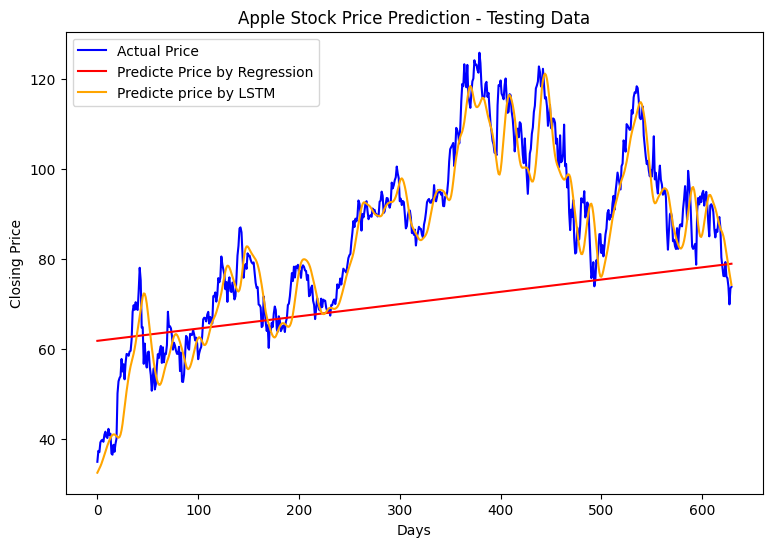

In [46]:
plt.figure(figsize=(9, 6))    #chart size
plt.plot(y, color='blue', label='Actual Price')    #line color and label name
plt.plot(y_predition_regression, color='red', label='Predicte Price by Regression')
plt.plot(predict_y,'orange', label='Predicte price by LSTM')
plt.title('Apple Stock Price Prediction - Testing Data')   #label title
plt.xlabel('Days')    #label x axis
plt.ylabel('Closing Price')  #label y axis
plt.legend()
plt.show()

Different machine learning algorithms have various properties and domains of use. Then, We have to choose the right algorithms to make investment decisions.




*   Linear regression is useful for predicting stock price movement.
*   LSTM is able to forecast market fluctuations and stock price volatility.

We need to calculate the root-mean-square error and compare which model is more accurate










### **Root Mean Square Error(RMSE)**
The Root Mean Square Error is a tool used to assess how well the model predicts the target value by calculating the deviation between the predicted and actual values.

(To learn more about RMSE)

https://help.sap.com/docs/SAP_ANALYTICS_CLOUD/00f68c2e08b941f081002fd3691d86a7/013dbeaff72444ca92dcafa75471f097.html?locale=en-US

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
RMSE_LSTM = np.sqrt(mean_squared_error(y_test, predict_y))
#Calculate the differnce of predicted value and actual orice
#Calculate Root Mean Square Error

In [89]:
RMSE_regression = np.sqrt(mean_squared_error(y_test, y_predition_regression))
#Calculate RMSE of regresssion
#Find the discrepancy with actual closing price

**RMSE** offers a benchmark for assessing a model's predictive accuracy.





In [90]:
print("RMSE of LSTM:", RMSE_LSTM)  #print result
print("RMSE of Regression:", RMSE_regression)

RMSE of LSTM: 57.85352431284394
RMSE of Regression: 72.7544846585389


### **Mean Absolute Error(MAE)**

The prediction model's evaluation error is the mean of the absolute differences between the actual and predicted values.

The lower mean absolute error (MAE), that is the better for model.

(To learn more about RMSE)

https://help.sap.com/docs/SAP_ANALYTICS_CLOUD/00f68c2e08b941f081002fd3691d86a7/5bc44b67fb6f4f9283186ca0082a9873.html?locale=en-US

In [91]:
from sklearn.metrics import mean_absolute_error   #make sure you have already: pip install scikit-learn

In [92]:
MAE_LSTM = mean_absolute_error(y_test, predict_y)
#calculate MAE of LSTM testing data set

In [93]:
MAE_regression = mean_absolute_error(y_test, y_predition_regression)
#calculate MAE of Regresssion testing data set

In [94]:
print("MAE of LSTM:", MAE_LSTM)    #print result
print("MAE of Regression:", MAE_regression)

MAE of LSTM: 57.572407785907416
MAE of Regression: 70.83252110104918












*   The model's prediction error distribution is uniform and there is no obvious extreme value or bias in the dataset, as shown by the large values of MAE and RMSE but not the large difference between the two values.
*   LSTM predict stock price has higher accuracy.


*   A lower RMSE and MAE value means that the model's prediction is closer to the actual observed value, so the LSTM model has the lower result than Regression model.





### **Conclusion**



This stock forecast report gives me a new understanding of the interact of mechanical learning and finance. According to the evaluation index results of RMSE and MAE, LSTM has a very good effect on the analysis of time series data. Moreover, there are some difference between the predicted value and the real closing price of the model, but based on the analysis and visualization results indicate that the general trend is still consistent.


In my view, I believe the major inaccuracy is caused by the stock market's excessive volatility during certain times of the year, which lowers the accuracy of the backward data forecast based on the forward trend.

